<a href="https://colab.research.google.com/github/fredyah/tudui-pytorch/blob/main/tudui_pytorch_total_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

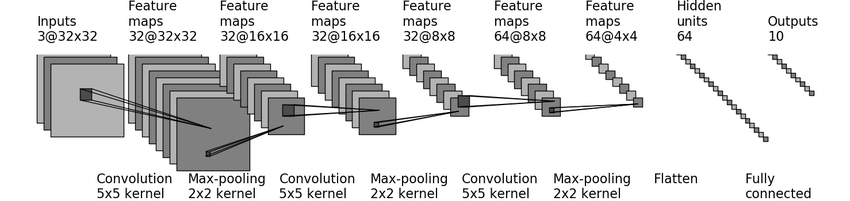

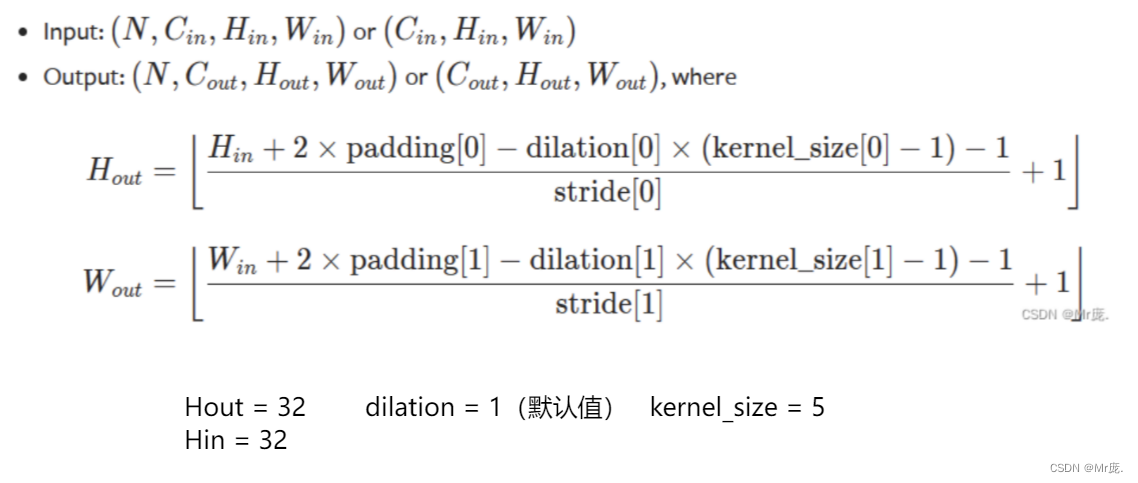

In [33]:
import torchvision
from torch.utils.data import DataLoader
import torch
from torch import nn


In [27]:
train_data = torchvision.datasets.CIFAR10(root="./dataset", train=True, transform=torchvision.transforms.ToTensor(),
                                       download=True)

test_data = torchvision.datasets.CIFAR10(root="./dataset", train=False, transform=torchvision.transforms.ToTensor(),
                                       download=True)

100%|██████████| 170498071/170498071 [00:01<00:00, 94709273.24it/s] 


Extracting ./dataset/cifar-10-python.tar.gz to ./dataset
Files already downloaded and verified


In [28]:
## 查看 Dataset 數量
train_data_size = len(train_data)
test_data_size = len(test_data)

print("Train Data Size =", train_data_size)
print("Test Data Size =", test_data_size)

Train Data Size = 50000
Test Data Size = 10000


In [30]:
## Load Data
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


In [36]:
## Create NN
class Tudui(nn.Module):
  def __init__(self):
    super(Tudui, self).__init__()
    self.model = nn.Sequential(
      nn.Conv2d(3, 32, 5, 1, 2),
      nn.MaxPool2d(2),
      nn.Conv2d(32, 32, 5, 1, 2),
      nn.MaxPool2d(2),
      nn.Conv2d(32, 64, 5, 1, 2),
      nn.MaxPool2d(2),
      nn.Flatten(),
      nn.Linear(64*4*4, 64),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    x = self.model(x)
    return x



In [40]:
tudui = Tudui()

## 建立 loss function
loss_fn = nn.CrossEntropyLoss()

## 建立 optimizer
#learning_rate = 0.01
learning_rate = 1e-2
optimizer = torch.optim.SGD(tudui.parameters(), lr=learning_rate)

In [ ]:
## 訓練次數：
total_train_step = 0

## 測試次數
total_test_step = 0

## 訓練輪數
epoch = 10

for i in range(epoch):
  print(f"-------------第 {i+1} 輪訓練開始-------------")

  ## 訓練步驟開始：
  for data in train_dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    loss = loss_fn(outputs, targets)

    ## 優化器優化模型
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"訓練次數: {total_train_step}, Loss: {loss.item()}")

-------------第 1 輪訓練開始-------------
訓練次數: 0, Loss: 2.290825843811035
訓練次數: 0, Loss: 2.2914881706237793
訓練次數: 0, Loss: 2.2772762775421143
訓練次數: 0, Loss: 2.25203537940979
訓練次數: 0, Loss: 2.2478690147399902
訓練次數: 0, Loss: 2.2622857093811035
訓練次數: 0, Loss: 2.2549328804016113
訓練次數: 0, Loss: 2.246206045150757
訓練次數: 0, Loss: 2.2518835067749023
訓練次數: 0, Loss: 2.2380385398864746
訓練次數: 0, Loss: 2.273179292678833
訓練次數: 0, Loss: 2.2403602600097656
訓練次數: 0, Loss: 2.271472215652466
訓練次數: 0, Loss: 2.268094539642334
訓練次數: 0, Loss: 2.2689249515533447
訓練次數: 0, Loss: 2.2879416942596436
訓練次數: 0, Loss: 2.265781879425049
訓練次數: 0, Loss: 2.256399631500244
訓練次數: 0, Loss: 2.251368761062622
訓練次數: 0, Loss: 2.227224588394165
訓練次數: 0, Loss: 2.2510039806365967
訓練次數: 0, Loss: 2.2430460453033447
訓練次數: 0, Loss: 2.2352335453033447
訓練次數: 0, Loss: 2.244006395339966
訓練次數: 0, Loss: 2.289633274078369
訓練次數: 0, Loss: 2.2721595764160156
訓練次數: 0, Loss: 2.2388429641723633
訓練次數: 0, Loss: 2.2640185356140137
訓練次數: 0, Loss: 2.27300548